In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
from gmdhpy.gmdh import Regressor

ModuleNotFoundError: No module named 'gmdhpy'

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_predictions1(test, predicted):
    sns.set(style="whitegrid", font_scale=1.2)  # Set the style and font scale

    plt.figure(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

    # Plotting the actual values
    sns.lineplot(data=test, color='red', linewidth=2, label='Real SPI')

    # Plotting the predicted values
    sns.lineplot(data=predicted, color='blue', linewidth=2, label='Predicted SPI')

    # Customizing the plot
    plt.title('SPI Value Prediction', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('SPI', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adding eye-catching elements
    plt.fill_between(range(len(test)), test, predicted, color='gray', alpha=0.2)
    plt.axvline(x=50, color='green', linestyle='--', linewidth=1.5)
    plt.text(50, max(test), 'Prediction Start', color='green', fontsize=12)

    # Adjusting the plot appearance
    sns.despine()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [5]:
import matplotlib.pyplot as plt

def plot_predictions2(test, predicted):
    plt.figure(figsize=(12, 6), dpi=150)  # Set the figure size and DPI

    # Plotting the actual values
    plt.plot(test, color='red', linewidth=1.5, label='Real SPI')

    # Plotting the predicted values
    plt.plot(predicted, color='blue', linewidth=1.5, label='Predicted SPI')

    # Customizing the plot
    plt.title('SPI Value Prediction', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('SPI', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adding eye-catching elements
    plt.fill_between(range(len(test)), test, predicted, color='gray', alpha=0.2)
    plt.axvline(x=50, color='green', linestyle='--', linewidth=1.5)
    plt.text(50, max(test), 'Prediction Start', color='green', fontsize=12)

    # Adjusting the plot appearance
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [6]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real SPI')
    plt.plot(predicted, color='blue',label='Predicted SPI')
    plt.title('SPI Value Prediction')
    plt.xlabel('Time')
    plt.ylabel('SPI')
    plt.legend()
    plt.figure(figsize=(16,4))
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    print("The MSE is {}".format(mean_squared_error(test, predicted)))
    print("The MAE is {}".format(mean_absolute_error(test, predicted)))
    print("The R2_Score is {}".format(r2_score(test, predicted)))

In [72]:
# First, we get the data
dataset = pd.read_csv(r"wavelet_kantamal.csv")
dataset.head()

,spi,Approximation,D 1,D 2,D 3,D 4,D 5,D 6
0,-0.16,-0.05,-0.19,0.42,-0.11,-0.27,-0.69,0.14
1,-0.14,-0.04,-0.06,0.35,-0.50,-0.31,-0.67,0.15
2,0.21,-0.03,-0.11,0.14,-0.63,-0.31,-0.62,0.17
3,0.51,-0.02,-0.01,-0.15,-0.50,-0.21,-0.53,0.20
4,0.92,-0.03,-0.03,-0.32,-0.16,-0.03,-0.42,0.24


In [73]:
X = dataset[['Approximation', 'D 2', 'D 3', 'D 4', 'D 6']].values  # Select the desired features
y = dataset.iloc[:, 0].values  # Target variable (SPI)


In [74]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [75]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create separate variables for the combined datasets
training_set = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
test_set = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
training_set

array([[ 0.22, -0.1 , -0.5 ,  0.  ,  0.08, -0.34],
       [ 0.21,  0.11,  0.02,  0.03, -0.02,  0.23],
       [ 0.17,  0.22, -0.62, -0.03, -0.4 , -0.77],
       ...,
       [ 0.29,  0.21, -1.56,  0.66, -0.08, -1.37],
       [ 0.13, -0.58,  0.42,  0.38, -0.32,  0.11],
       [-0.04, -0.61,  0.64,  0.04,  0.21,  1.23]])

In [76]:
# # Checking for missing values
# training_set = dataset[:'2016'].iloc[:,1:2].values
# test_set = dataset['2017':].iloc[:,1:2].values

In [77]:
# # We have chosen 'High' attribute for prices. Let's see what it looks like
# dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
# dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
# plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
# plt.title('CSCO stock price')
# plt.show()

In [78]:
# # Scaling the training set
# sc = MinMaxScaler(feature_range=(0,1))
# training_set_scaled = sc.fit_transform(training_set)
# # print(training_set_scaled.shape)
# print(training_set.shape)
# print(test_set.shape)

In [79]:
# X_train = []
# y_train = []
# for i in range(60,training_set.shape[0]):
#     X_train.append(training_set[i-20:i,0])
#     y_train.append(training_set[i,0])
# X_train, y_train = np.array(X_train), np.array(y_train)
# print(X_train.shape)
# print(y_train.shape)

In [80]:
gmdh = Regressor(ref_functions=('cubic','quadratic','linear','linear_cov'),
                      criterion_type='validate',
                      criterion_minimum_width=5,
                      stop_train_epsilon_condition=0.01,
                      layer_err_criterion='top',
                      l2=0.5,
                      verbose=1,
                      n_jobs='max')

In [81]:
# # Now to get the test set ready in a similar way as the training set.
# # The following has been done so first 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# # 'High' attribute data for processing
# # dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
# inputs = X_train
# # print(inputs.shape)
# inputs = inputs.reshape(-1,1)
# print(inputs.shape)

# # print(inputs.shape)
# # inputs  = sc.transform(inputs)
# # print(inputs.shape)
# print(X_test.shape)

In [82]:
# Preparing X_test and predicting the prices
# X_test = []
# y_test = []
# for i in range(60,inputs.shape[0]):
#     X_test.append(inputs[i-20:i,0])
#     y_test.append(inputs[i,0])
# X_test, y_test = np.array(X_test), np.array(y_test)
# print(X_test.shape)
# print(y_test.shape)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(392, 5)
(392,)
(98, 5)
(98,)


In [83]:
gmdh.fit(X_train,y_train)

train layer0 in 3.24 sec
train layer1 in 0.13 sec
train layer2 in 0.10 sec


In [84]:
final_predictions = gmdh.predict(X_test)
print(final_predictions.shape)
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price.reshape(-1,1)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(98,)


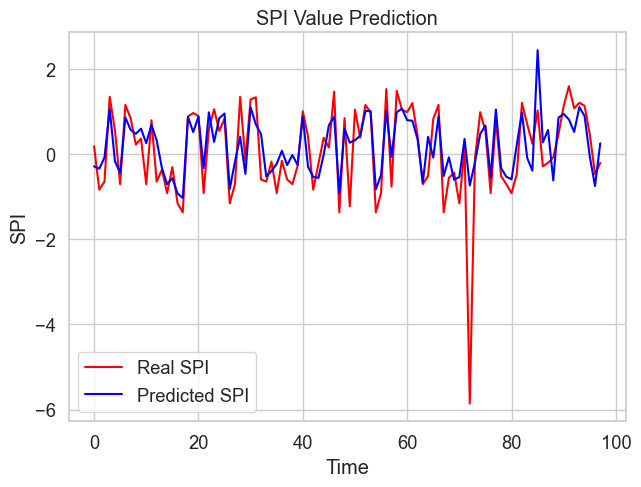

<Figure size 1600x400 with 0 Axes>

In [85]:
plot_predictions(y_test,final_predictions)

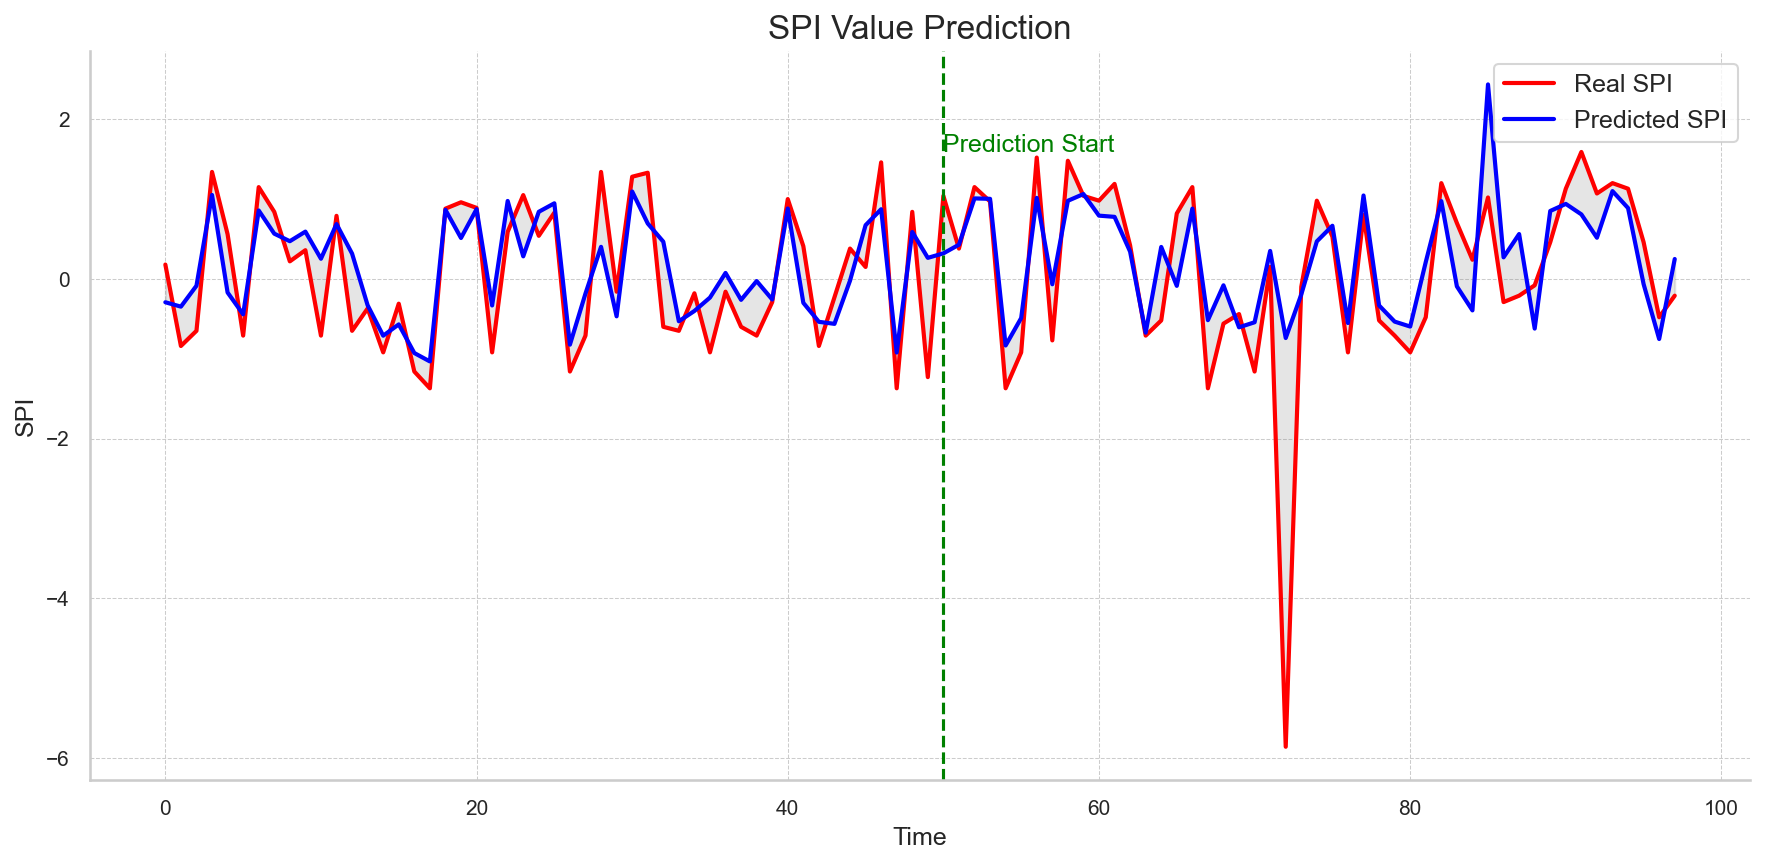

In [86]:
plot_predictions1(y_test,final_predictions)

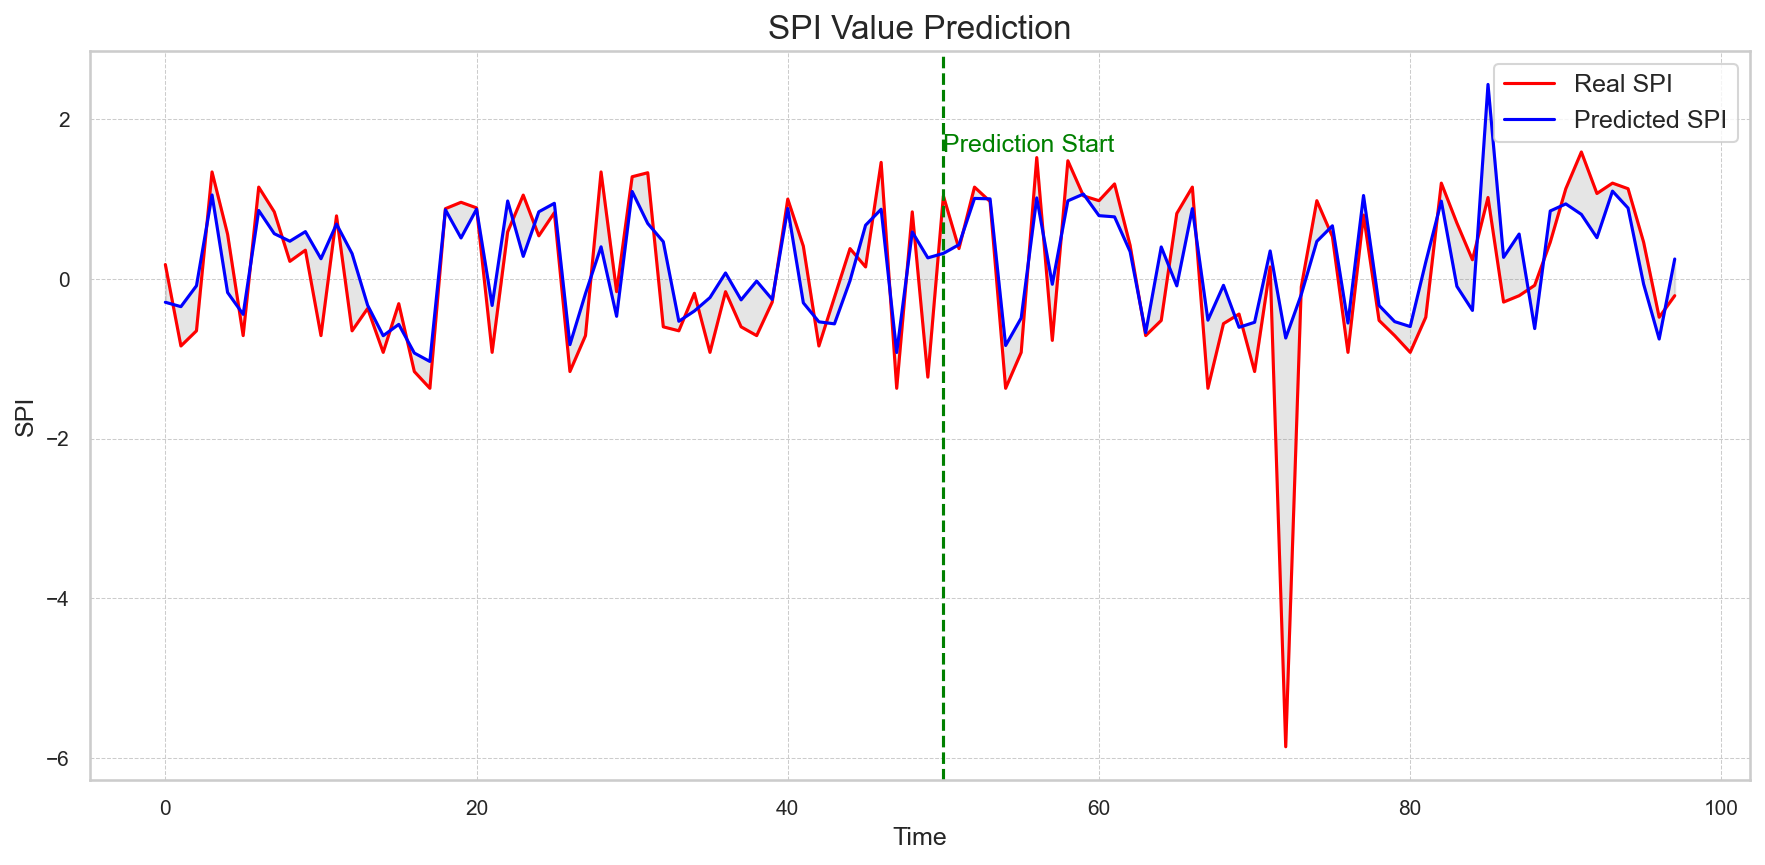

In [87]:
plot_predictions2(y_test,final_predictions)

In [88]:
return_rmse(y_test,final_predictions)

The root mean squared error is 0.7294615238503209.
The MSE is 0.5321141147780324
The MAE is 0.47116644362404797
The R2_Score is 0.5127726578716852


In [89]:
from sklearn.metrics import r2_score
y_test, final_predictions = list(y_test),list(final_predictions)
# gmdh.score(y_test, predicted_stock_price)
r2_score(y_test, final_predictions)

0.5127726578716852

In [90]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_evaluation_metrics(y_observed, y_predicted):
     # Convert to NumPy arrays if they are lists
    if isinstance(y_observed, list):
        y_observed = np.array(y_observed)
    if isinstance(y_predicted, list):
        y_predicted = np.array(y_predicted)
        
    metrics = {}

    # Calculate ME (Mean Error)
    metrics['ME'] = np.mean(y_observed - y_predicted)

    # Calculate MAE (Mean Absolute Error)
    metrics['MAE'] = mean_absolute_error(y_observed, y_predicted)

    # Calculate MSE (Mean Squared Error)
    metrics['MSE'] = mean_squared_error(y_observed, y_predicted)

    # Calculate RMSE (Root Mean Squared Error)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Calculate NRMSE (Normalized Root Mean Squared Error)
    metrics['NRMSE'] = metrics['RMSE'] / (np.max(y_observed) - np.min(y_observed))

    # Calculate PBIAS (Percent Bias)
    metrics['PBIAS'] = np.mean(100 * (y_observed - y_predicted) / np.mean(y_observed))

    # Calculate RSR (Root Mean Square Ratio)
    metrics['RSR'] = metrics['RMSE'] / np.std(y_observed)

    # Calculate rSD (Ratio of the Standard Deviation)
    metrics['rSD'] = np.std(y_observed - y_predicted) / np.std(y_observed)

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    metrics['NSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate mNSE (Modified Nash-Sutcliffe Efficiency)
    metrics['mNSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate rNSE (Relative Nash-Sutcliffe Efficiency)
    metrics['rNSE'] = metrics['NSE'] / np.var(y_observed)

    # Calculate d (Index of Agreement)
    metrics['d'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                       np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate md (Modified d Index)
    metrics['md'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate rd (Relative d Index)
    metrics['rd'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate cp (Coefficient of Performance)
    metrics['cp'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                         np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate r (Index of Agreement)
    metrics['r'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                        np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate R2 (Coefficient of Determination)
    metrics['R2'] = r2_score(y_observed, y_predicted)

    return metrics


In [91]:
evaluation_metrics = calculate_evaluation_metrics(y_test, final_predictions)
print(evaluation_metrics)


{'ME': -0.10978059388310789, 'MAE': 0.47116644362404797, 'MSE': 0.5321141147780324, 'RMSE': 0.7294615238503209, 'NRMSE': 0.09791429850339878, 'PBIAS': -150.46850630132272, 'RSR': 0.6980167205220192, 'rSD': 0.6900668066382725, 'NSE': 0.5127726578716852, 'mNSE': 0.5127726578716852, 'rNSE': 0.46951744423301106, 'd': 0.7967899740878929, 'md': 0.7967899740878929, 'rd': 0.7967899740878929, 'cp': 0.7967899740878929, 'r': 0.7967899740878929, 'R2': 0.5127726578716852}


In [92]:
k=11
print(y_test[k],final_predictions[k])


0.79 0.6868477542941798


In [93]:
# # Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# # So for each element of training set, we have 60 previous training set elements 
# X_train = []
# y_train = []
# for i in range(60,2769):
#     X_train.append(training_set_scaled[i-60:i,0])
#     y_train.append(training_set_scaled[i,0])
# X_train, y_train = np.array(X_train), np.array(y_train)

In [94]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [95]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=30, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=30, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=30))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=1000,batch_size=16)

Epoch 1/1000
25/25 [==============================] - 21s 26ms/step - loss: 1.0379
Epoch 2/1000
25/25 [==============================] - 1s 24ms/step - loss: 1.0260
Epoch 3/1000
25/25 [==============================] - 1s 22ms/step - loss: 1.0160
Epoch 4/1000
25/25 [==============================] - 1s 23ms/step - loss: 0.9944
Epoch 5/1000
25/25 [==============================] - 1s 27ms/step - loss: 0.9366
Epoch 6/1000
25/25 [==============================] - 1s 28ms/step - loss: 0.8637
Epoch 7/1000
25/25 [==============================] - 1s 33ms/step - loss: 0.7865
Epoch 8/1000
25/25 [==============================] - 1s 30ms/step - loss: 0.6974
Epoch 9/1000
25/25 [==============================] - 1s 31ms/step - loss: 0.6426
Epoch 10/1000
25/25 [==============================] - 0s 16ms/step - loss: 0.6045
Epoch 11/1000
25/25 [==============================] - 1s 23ms/step - loss: 0.5957
Epoch 12/1000
25/25 [==============================] - 1s 26ms/step - loss: 0.5837
Epoch 13/100

25/25 [==============================] - 1s 25ms/step - loss: 0.5065
Epoch 197/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.5230
Epoch 198/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.5111
Epoch 199/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4909
Epoch 200/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4754
Epoch 201/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4998
Epoch 202/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.5159
Epoch 203/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.5094
Epoch 204/1000
25/25 [==============================] - 1s 26ms/step - loss: 0.5225
Epoch 205/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4967
Epoch 206/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4928
Epoch 207/1000
25/25 [==============================] - 1s 26ms/step - loss: 0.4790
Epoch 2

25/25 [==============================] - 1s 27ms/step - loss: 0.4831
Epoch 391/1000
25/25 [==============================] - 1s 26ms/step - loss: 0.4508
Epoch 392/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4773
Epoch 393/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4611
Epoch 394/1000
25/25 [==============================] - 1s 27ms/step - loss: 0.4459
Epoch 395/1000
25/25 [==============================] - 1s 27ms/step - loss: 0.4548
Epoch 396/1000
25/25 [==============================] - 1s 24ms/step - loss: 0.4602
Epoch 397/1000
25/25 [==============================] - 1s 26ms/step - loss: 0.4595
Epoch 398/1000
25/25 [==============================] - 1s 24ms/step - loss: 0.4651
Epoch 399/1000
25/25 [==============================] - 1s 27ms/step - loss: 0.4489
Epoch 400/1000
25/25 [==============================] - 1s 23ms/step - loss: 0.4493
Epoch 401/1000
25/25 [==============================] - 1s 25ms/step - loss: 0.4580
Epoch 4

25/25 [==============================] - 1s 36ms/step - loss: 0.4102
Epoch 585/1000
25/25 [==============================] - 1s 36ms/step - loss: 0.3758
Epoch 586/1000
25/25 [==============================] - 1s 34ms/step - loss: 0.3953
Epoch 587/1000
25/25 [==============================] - 1s 35ms/step - loss: 0.3630
Epoch 588/1000
25/25 [==============================] - 1s 37ms/step - loss: 0.3764
Epoch 589/1000
25/25 [==============================] - 1s 33ms/step - loss: 0.3673
Epoch 590/1000
25/25 [==============================] - 1s 30ms/step - loss: 0.4014
Epoch 591/1000
25/25 [==============================] - 1s 29ms/step - loss: 0.3732
Epoch 592/1000
25/25 [==============================] - 1s 30ms/step - loss: 0.3731
Epoch 593/1000
25/25 [==============================] - 1s 30ms/step - loss: 0.3737
Epoch 594/1000
25/25 [==============================] - 1s 30ms/step - loss: 0.3847
Epoch 595/1000
25/25 [==============================] - 1s 31ms/step - loss: 0.3463
Epoch 5

25/25 [==============================] - 1s 29ms/step - loss: 0.3127
Epoch 779/1000
25/25 [==============================] - 1s 29ms/step - loss: 0.2552
Epoch 780/1000
25/25 [==============================] - 1s 26ms/step - loss: 0.2737
Epoch 781/1000
25/25 [==============================] - 1s 24ms/step - loss: 0.2828
Epoch 782/1000
25/25 [==============================] - 1s 28ms/step - loss: 0.2422
Epoch 783/1000
25/25 [==============================] - 1s 27ms/step - loss: 0.2525
Epoch 784/1000
25/25 [==============================] - 1s 29ms/step - loss: 0.2581
Epoch 785/1000
25/25 [==============================] - 1s 29ms/step - loss: 0.2531
Epoch 786/1000
25/25 [==============================] - 1s 31ms/step - loss: 0.3337
Epoch 787/1000
25/25 [==============================] - 1s 33ms/step - loss: 0.2431
Epoch 788/1000
25/25 [==============================] - 1s 32ms/step - loss: 0.2478
Epoch 789/1000
25/25 [==============================] - 1s 32ms/step - loss: 0.2586
Epoch 7

25/25 [==============================] - 1s 26ms/step - loss: 0.2171
Epoch 973/1000
25/25 [==============================] - 1s 30ms/step - loss: 0.2395
Epoch 974/1000
25/25 [==============================] - 1s 31ms/step - loss: 0.2057
Epoch 975/1000
25/25 [==============================] - 1s 29ms/step - loss: 0.2244
Epoch 976/1000
25/25 [==============================] - 1s 30ms/step - loss: 0.2280
Epoch 977/1000
25/25 [==============================] - 1s 29ms/step - loss: 0.2211
Epoch 978/1000
25/25 [==============================] - 1s 29ms/step - loss: 0.2352
Epoch 979/1000
25/25 [==============================] - 1s 31ms/step - loss: 0.2010
Epoch 980/1000
25/25 [==============================] - 1s 34ms/step - loss: 0.2082
Epoch 981/1000
25/25 [==============================] - 1s 33ms/step - loss: 0.2531
Epoch 982/1000
25/25 [==============================] - 1s 33ms/step - loss: 0.2214
Epoch 983/1000
25/25 [==============================] - 1s 33ms/step - loss: 0.2167
Epoch 9

In [96]:
# # Now to get the test set ready in a similar way as the training set.
# # The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# # 'High' attribute data for processing
# dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
# inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs  = sc.transform(inputs)

In [97]:
# # Preparing X_test and predicting the prices
# X_test = []
# for i in range(60,311):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [98]:
predicted_spi = regressor.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_spi

4/4 [==============================] - 5s 14ms/step


array([[-0.8078367 ],
       [-0.81884986],
       [-0.5218587 ],
       [ 0.9520377 ],
       [ 0.24345084],
       [-0.7065701 ],
       [ 0.9835254 ],
       [ 0.66371834],
       [ 0.61879236],
       [ 0.82068384],
       [-0.4059101 ],
       [ 0.5967335 ],
       [-0.38649803],
       [-0.6399621 ],
       [-0.42526272],
       [ 0.03230153],
       [-0.44838983],
       [-0.39639413],
       [ 1.1502343 ],
       [ 0.73936945],
       [ 1.0525242 ],
       [ 0.03675963],
       [ 1.1993821 ],
       [ 0.84321105],
       [ 1.1127113 ],
       [ 1.1172112 ],
       [-0.41355255],
       [-0.730311  ],
       [ 0.7458014 ],
       [-0.54688644],
       [ 1.35106   ],
       [ 0.8244438 ],
       [-0.29734248],
       [-0.9907589 ],
       [-0.46444756],
       [-0.16509396],
       [-0.6305777 ],
       [-0.79609555],
       [-0.46974534],
       [-0.36432436],
       [ 0.8195839 ],
       [-0.8977196 ],
       [-0.56230074],
       [-1.155468  ],
       [-0.03634028],
       [ 0

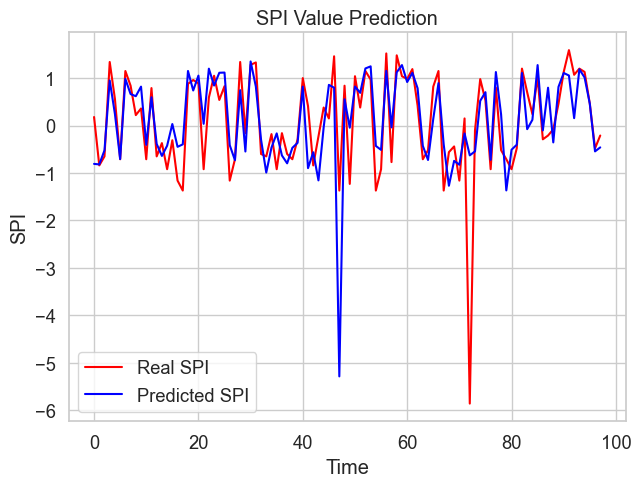

<Figure size 1600x400 with 0 Axes>

In [99]:
# Visualizing the results for LSTM
plot_predictions(y_test,predicted_spi)

In [100]:
# Evaluating our model
return_rmse(y_test,predicted_spi)

The root mean squared error is 0.8189143875133643.
The MSE is 0.6706207740763886
The MAE is 0.47876324573645784
The R2_Score is 0.38594980239234744


In [101]:
evaluation_metrics = calculate_evaluation_metrics(y_test, predicted_spi)
print(evaluation_metrics)

{'ME': -0.03419909731161838, 'MAE': 0.47876324573645784, 'MSE': 0.6706207740763886, 'RMSE': 0.8189143875133643, 'NRMSE': 0.10992139429709588, 'PBIAS': -46.87428722431612, 'RSR': 0.7836135511893937, 'rSD': 1.3382906106005217, 'NSE': -174.6250822749369, 'mNSE': -174.6250822749369, 'rNSE': -159.89448943906925, 'd': 0.38204547886850604, 'md': 0.38204547886850604, 'rd': 0.38204547886850604, 'cp': 0.38204547886850604, 'r': 0.38204547886850604, 'R2': 0.38594980239234744}


Truth be told. That's one awesome score. 

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

## Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

In [102]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=300,batch_size=64)

Epoch 1/300


C:\Users\asitg\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 21s 28ms/step - loss: 1.0272
Epoch 2/300
7/7 [==============================] - 0s 30ms/step - loss: 1.0159
Epoch 3/300
7/7 [==============================] - 0s 35ms/step - loss: 1.0073
Epoch 4/300
7/7 [==============================] - 0s 31ms/step - loss: 0.9881
Epoch 5/300
7/7 [==============================] - 0s 32ms/step - loss: 0.9859
Epoch 6/300
7/7 [==============================] - 0s 37ms/step - loss: 0.9396
Epoch 7/300
7/7 [==============================] - 0s 51ms/step - loss: 0.9026
Epoch 8/300
7/7 [==============================] - 0s 36ms/step - loss: 0.8366
Epoch 9/300
7/7 [==============================] - 0s 35ms/step - loss: 0.7986
Epoch 10/300
7/7 [==============================] - 0s 35ms/step - loss: 0.7836
Epoch 11/300
7/7 [==============================] - 0s 40ms/step - loss: 0.8485
Epoch 12/300
7/7 [==============================] - 0s 32ms/step - loss: 0.7894
Epoch 13/300
7/7 [==============================] - 0s 35ms/

7/7 [==============================] - 0s 33ms/step - loss: 0.5452
Epoch 205/300
7/7 [==============================] - 0s 44ms/step - loss: 0.5530
Epoch 206/300
7/7 [==============================] - 0s 43ms/step - loss: 0.5455
Epoch 207/300
7/7 [==============================] - 0s 30ms/step - loss: 0.5356
Epoch 208/300
7/7 [==============================] - 0s 31ms/step - loss: 0.5419
Epoch 209/300
7/7 [==============================] - 0s 32ms/step - loss: 0.5490
Epoch 210/300
7/7 [==============================] - 0s 42ms/step - loss: 0.5558
Epoch 211/300
7/7 [==============================] - 0s 45ms/step - loss: 0.5337
Epoch 212/300
7/7 [==============================] - 0s 48ms/step - loss: 0.5755
Epoch 213/300
7/7 [==============================] - 0s 52ms/step - loss: 0.5432
Epoch 214/300
7/7 [==============================] - 0s 44ms/step - loss: 0.5401
Epoch 215/300
7/7 [==============================] - 0s 57ms/step - loss: 0.5612
Epoch 216/300
7/7 [=======================

The current version version uses a dense GRU network with 100 units as opposed to the GRU network with 50 units in previous version

In [103]:
# # Preparing X_test and predicting the prices
# X_test = []
# for i in range(60,311):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_spi = regressorGRU.predict(X_test)
# GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
GRU_predicted_spi

4/4 [==============================] - 4s 8ms/step


array([[ 0.00398327],
       [-0.25887722],
       [-0.11004553],
       [ 1.1869421 ],
       [-0.13707444],
       [-0.49336135],
       [ 0.831144  ],
       [ 0.85912466],
       [ 1.014853  ],
       [ 0.36561203],
       [ 0.6954926 ],
       [ 0.8675293 ],
       [ 0.2607295 ],
       [-0.37663165],
       [-0.77619475],
       [-0.29155043],
       [-0.6928001 ],
       [-0.7683952 ],
       [ 0.9297573 ],
       [ 0.40695795],
       [ 0.8428378 ],
       [-0.33311436],
       [ 1.0137154 ],
       [ 0.26859692],
       [ 0.95982546],
       [ 0.9989498 ],
       [-0.8050598 ],
       [-0.12661847],
       [ 0.56089866],
       [-0.5583421 ],
       [ 0.55227405],
       [ 0.62445825],
       [ 0.13790894],
       [-0.63571376],
       [-0.48826343],
       [-0.17581603],
       [ 0.23179737],
       [ 0.05854743],
       [-0.26069856],
       [-0.33128068],
       [ 0.84990656],
       [-0.5061854 ],
       [-0.8388283 ],
       [-0.66160256],
       [ 0.3077618 ],
       [ 0

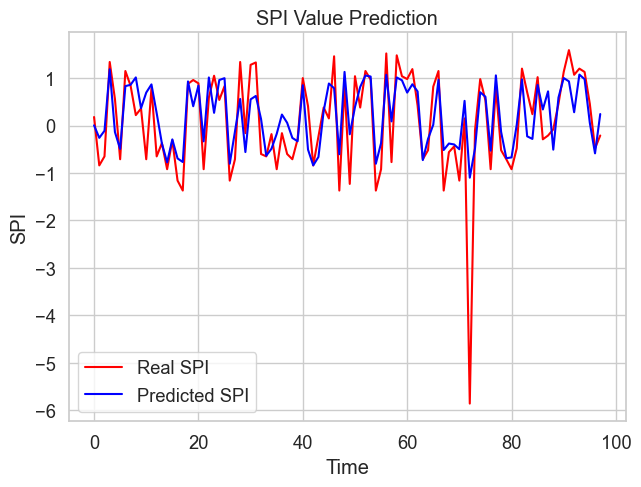

<Figure size 1600x400 with 0 Axes>

In [104]:
# Visualizing the results for GRU
plot_predictions(y_test,GRU_predicted_spi)

In [105]:
# Evaluating GRU
return_rmse(y_test,GRU_predicted_spi)

The root mean squared error is 0.6967223177580376.
The MSE is 0.48542198806213194
The MAE is 0.45606850655711434
The R2_Score is 0.5555260450987776


In [106]:
evaluation_metrics = calculate_evaluation_metrics(y_test, GRU_predicted_spi)
print(evaluation_metrics)

{'ME': -0.11762208528056439, 'MAE': 0.45606850655711434, 'MSE': 0.48542198806213194, 'RMSE': 0.6967223177580376, 'NRMSE': 0.09351977419570974, 'PBIAS': -161.21628472021416, 'RSR': 0.6666887991418653, 'rSD': 1.1739925051453177, 'NSE': -135.31077759695518, 'mNSE': -135.31077759695518, 'rNSE': -123.8965640995654, 'd': 0.3877877260292957, 'md': 0.3877877260292957, 'rd': 0.3877877260292957, 'cp': 0.3877877260292957, 'r': 0.3877877260292957, 'R2': 0.5555260450987776}
